# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [56]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.stats as stats

In [57]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [58]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

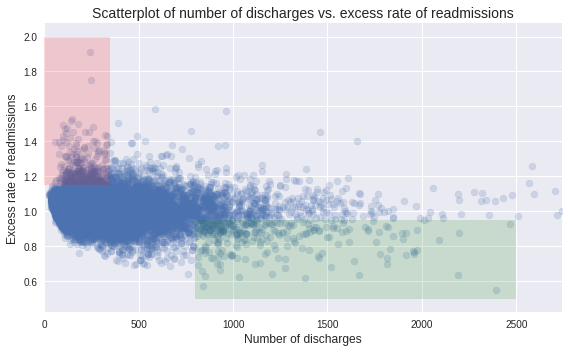

In [59]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

In [60]:
clean_hospital_read_df

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15625,FAIRVIEW DEVELOPMENTAL CENTER,50548,CA,READM-30-HF-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15642,WAGONER COMMUNITY HOSPITAL,370166,OK,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15648,ST LUKE'S HOSPITAL AT THE VINTAGE,670075,TX,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15652,SOUTH TEXAS SURGICAL HOSPITAL,670061,TX,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15396,GEORGE L MEE MEMORIAL HOSPITAL,50189,CA,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

### A: 
I don't fully agree with the above conclusions, analysis and recommendations:

- According to the first conclusion, there is a significant correlation between number of discharges and readmission rates. However, there is no statistical test to back this claim, and it relies solely on the scatter plot and on the mean of the excess readmission rate for two non exhaustive parts of the data (number of discharges < 100 and number of discharges > 1000, disregarding the middle section of 100<=number of discharges<=1000). When I calculate the pearson correlation coefficient, I get a correlation coefficient of -0.097, which is not a strong correlation at all.
The analysis only takes into account a small portion of the data, and drawing conclusions according to that small portion, which could be wrong since those portions could be outliers.


- In the analysis section, hospitals are considered to have a small capacity if their number of discharges < 100. However, in the recommendations section, hospitals/facilties are considered to have a small capacity, if they have less then 300 discharges. Hence, the recommendations section and analysis section are inconsistent in their definition of small capacity.

### B: 
#### Answer 1:
I will perform an hypothesis test in order to back or refute the conclusions:

H0: The excess readmission rate for small hospitals (number of discharges < 100) and large hospitals (number of discharges > 1000) is the same.

H1: The excess readmission rate for small hospitals and large hospitals is different.

In [61]:
clean_hospital_read_df.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      11497
Excess Readmission Ratio         81
Predicted Readmission Rate       81
Expected Readmission Rate        81
Number of Readmissions           81
Start Date                        0
End Date                          0
dtype: int64

In [62]:
# Cleaning the data from null values
clean_hospital_read_df = clean_hospital_read_df[clean_hospital_read_df['Excess Readmission Ratio'].notnull()]
clean_hospital_read_df.isnull().sum()

Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      11497
Excess Readmission Ratio          0
Predicted Readmission Rate        0
Expected Readmission Rate         0
Number of Readmissions            0
Start Date                        0
End Date                          0
dtype: int64

In [63]:
# Dividing the data into two groups according to the hypothesis
low_discharge = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100]['Excess Readmission Ratio']
high_discharge = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]['Excess Readmission Ratio']

In [64]:
# two-sample t-test
stats.ttest_ind(low_discharge,high_discharge)

Ttest_indResult(statistic=10.060620398500793, pvalue=3.778753923341558e-23)

#### Answer 2-3:
The t-statistic is 10.06 and the corresponding p-value is 3.78e-23. Therefore, under statistical significance for α = .01 we can reject the null hypothesis, and conclude that there is a significant difference between small hospitals and large hospitals, in their excess readmission rate, such that smaller hospitals have larger excess readmission rate than smaller hospitals.

In [65]:
mean_low_discharge = np.mean(low_discharge)
mean_high_discharge = np.mean(high_discharge)
mean_low_discharge - mean_high_discharge

0.04428292900204345

In [66]:
# Correlation between the number of discharges and excess readmission ratio
np.corrcoef(clean_hospital_read_df[['Number of Discharges','Excess Readmission Ratio']],rowvar=False)[0,1]

-0.097397943510793533

In [67]:
# Linear regression between number of discharges and excess readmission ratio
np.polyfit(clean_hospital_read_df['Number of Discharges'],clean_hospital_read_df['Excess Readmission Ratio'],1)

array([ -2.90105173e-05,   1.01810615e+00])

#### Answer 4:
The statistical test was indeed significant, however, if we look at some metrics such as the numeric difference between the two groups, the linear regression slope and the correlation coefficient, we can see that the trend is very weak so the practical significance is weak. I would definitely not hurry to recommend on consolidation of hospitals, because the evidence is not strong enough against small hospitals, regarding excess readmission.

#### Answer 5:
The advantages of using the above plot to convey information, is that because all of the data points are in the same plot, the trend can be detected. The disadvantages are that the plot is very dense, so the interesting sections of the plot can get a little lost because of the volume of data in the plot.

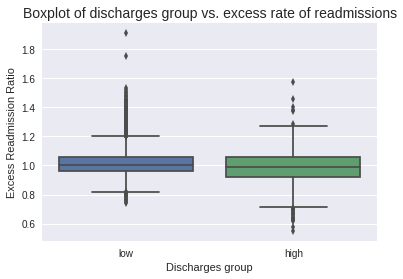

In [68]:
low_discharge_df = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] <= 350)].copy()
high_discharge_df = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] >= 800) & (clean_hospital_read_df['Number of Discharges'] <= 2500)].copy()
high_discharge_df['Discharges group'] = 'high'
low_discharge_df['Discharges group'] = 'low'
tmp_df = pd.concat([low_discharge_df,high_discharge_df])
ax = sns.boxplot(x="Discharges group", y="Excess Readmission Ratio", data=tmp_df)
ax.set_title('Boxplot of discharges group vs. excess rate of readmissions', fontsize=14)